In [1]:
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# single stick sticking down

In [2]:
def run2taskL(taskL,nitr=50):
  ntasks = len(taskL)
  rt = np.zeros([nitr,4,ntasks])
  smode = np.zeros([nitr,4,ntasks])
  sol_L = []
  for idx,(mem,bfs) in enumerate(itertools.product([False,True],[True,False])):
    sol_L.append([])
    for itr in range(nitr):
      D = treeSearch(taskL,BFS=bfs,memory=mem)
      rt[itr,idx],smode[itr,idx] = D['rt'],D['smode']
      sol_L[idx].append([i.valid_actions for i in D['solution_nodes']])
  return rt,smode,np.array(sol_L)
idxL = ['BFS','DFS','BFSm','DFSm']

In [3]:
def line_plt_rt(ax,rt):
  for mi in range(len(idxL)):
    M = rt.mean(0)[mi]
    S = rt.std(0)[mi]/np.sqrt(len(rt))
    ax.plot(M,label=idxL[mi])
    ax.fill_between(range(len(M)),M-S,M+S,alpha=0.4)
  ax.legend()

In [10]:
from board_gen import *
nitr=20

In [30]:
# bias join
taskL_join = []
taskL_join += [generate_board(tactic_name='bias_join',n_extra_sticks=1,contiguous=True) for i in range(2)]
taskL_join += [generate_board(tactic_name='bias_final',n_extra_sticks=1,contiguous=True) for i in range(1)]
# bias loose
taskL_loose = []
taskL_loose += [generate_board(tactic_name='bias_loose',n_extra_sticks=1,contiguous=True) for i in range(2)]
taskL_loose += [generate_board(tactic_name='bias_final',n_extra_sticks=1,contiguous=True) for i in range(1)]

rt_join,smode_join,sol_join = run2taskL(taskL_join,nitr)
rt_loose,smode_loose,sol_loose = run2taskL(taskL_loose,nitr)

<ipython-input-2-ab6e1d696832>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return rt,smode,np.array(sol_L)


In [41]:
sol_loose.shape # algo,itr,trial
sol_loose[(2,3),0,:]

array([[array([ 7,  9, 10, 11, 12, 13, 14, 16]),
        array([ 4,  7,  9, 10, 11, 12, 13, 14, 16]),
        array([ 7,  9, 10, 11, 12, 13, 14, 16, 19])],
       [array([ 7,  9, 10, 11, 12, 13, 14, 16]),
        array([ 7,  9, 10, 11, 12, 13, 14, 16]),
        array([ 7,  9, 10, 11, 12, 13, 14, 16, 19])]], dtype=object)

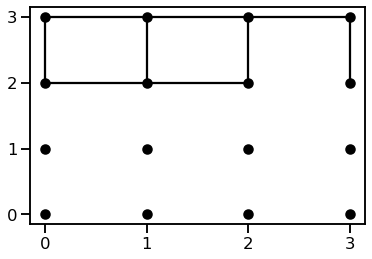

In [24]:
draw_board(plt.gca(),sol_L[3,0,4])

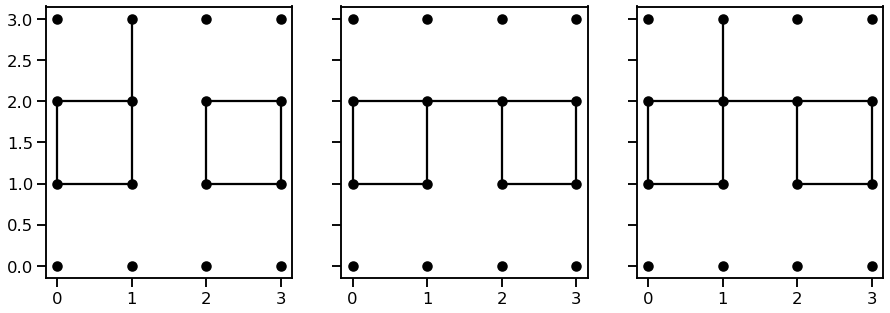

In [13]:
from utils import *
f,axar = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
ax = axar[0]
draw_board(ax,BIAS_BOARD_LOOSE)
ax = axar[1]
draw_board(ax,BIAS_BOARD_JOIN)
ax = axar[2]
draw_board(ax,BIAS_BOARD_FINAL)